# Exploratory Data Analysis on Palmer Penguins Dataset
The Palmer Archipelago Penguins Dataset is a dataset that contains biometric data about three different penguin species from the Palmer Archipelago region. This dataset is used to identify the species of penguins and is particularly popular for machine learning, data analysis, and visualization training. The Palmer Archipelago is a group of islands located at the northern tip of Antarctica, home to many penguin colonies.

The dataset consists of data collected from three penguin species living around Palmer Station: Adelie, Chinstrap, and Gentoo. These three species differ in appearance and size, and the dataset is used to analyze the differences between these species.

Story and Purpose of the Dataset
The Palmer Archipelago Penguins Dataset aims to classify penguin species based on their physical characteristics. By providing information about the species' environment and size, the dataset helps researchers better understand these creatures. It is an ideal resource for biologists and students to learn about the differences between biological species and develop their data analysis skills, particularly using techniques like machine learning.

The dataset is often presented as an alternative to the Iris dataset, as it offers more biological diversity and allows for more complex analyses. It is also excellent for visualization, offering various relationships that can be explored.

In this notebook, Palmer Penguins Dataset will be used for applying Exploratory Data Aanalysis (EDA) methods to have the first insights on data, starting with importing necessary libraries.
## Importing the Libraries

In [25]:
import numpy as np
import pandas as pd

Now, let's read  the csv file into a pandas dataframe.

In [26]:
penguins_df = pd.read_csv("/kaggle/input/palmer-penguins-dataset-for-eda/penguins.csv")

## First Look at the Data
There will be used some exploratory methods from pandas library to make more clear understanding of the data.

In [27]:
penguins_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [28]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Each column seems to have the right datatypes for themselves. In our further investigation, we will be converting categorical values into numerical values (type that the machine can read).

In [29]:
penguins_df.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Features of the Dataset
* ***species***: The species of the penguin. This is the target variable and is used for classification. ***Values***: 'Adelie', 'Chinstrap', 'Gentoo'
* ***island***: The island where the penguin lives. This feature can vary depending on the penguin’s geographic location. ***Values***: 'Biscoe', 'Dream', 'Torgersen'
* ***bill_length_mm***: The bill length of the penguin (in millimeters). Bill length can vary across species, making it a potentially important feature for classification.
* ***bill_depth_mm***: The bill depth of the penguin (in millimeters). Bill depth can help in identifying and distinguishing penguin species.
* ***flipper_length_mm***: The flipper length of the penguin (in millimeters). Flipper length can vary between penguin species and may serve as an important distinguishing feature.
* ***body_mass_g***: The body mass of the penguin (in grams). Body mass can be an important distinguishing factor between species.
* ***sex***: The gender of the penguin. Gender can influence certain characteristics of the penguin, though not all data points have gender information. ***Values***: 'Male', 'Female'
* ***year***: The year the data was collected. This feature can be used to explore any differences or trends over time.

In [30]:
penguins_df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [31]:
penguins_df.groupby("species")["id"].count()

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: id, dtype: int64

Let's visualize the distribution of the species.

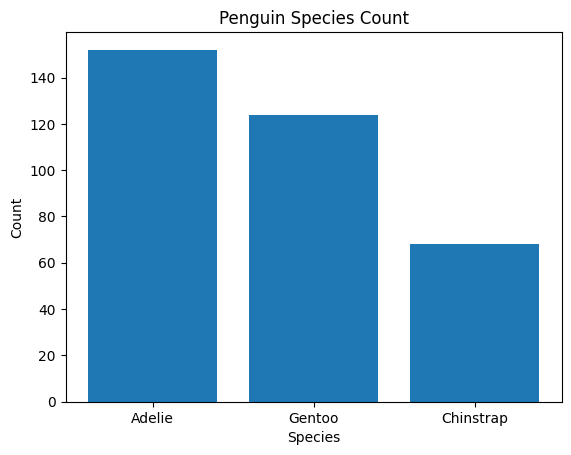

In [32]:
import matplotlib.pyplot as plt

species_counts = penguins_df["species"].value_counts()

plt.bar(species_counts.index, species_counts.values)

plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Penguin Species Count")

plt.show()

In [33]:
# Finding the unique values of the "sex" column
penguins_df["sex"].unique()

array(['male', 'female', nan], dtype=object)

There are 3 different values in the sexuality column, let's fill the nan values then encode them by using mapping method with dictionaries and by using pd.get_dummies().
There we will be using a copy of the dataframe for experiencing the both methods.

In [34]:
# Mapping method
copy_df = penguins_df.copy()

cat_col_mode = copy_df["sex"].mode()[0]
copy_df["sex"] = copy_df["sex"].fillna(cat_col_mode)

mapping_dict = {"male": 0,
               "female":1}

copy_df["sex"] = copy_df["sex"].map(mapping_dict)

# Check the table
copy_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,0,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,2007


In [35]:
# One hot encoding
cat_col_mode = penguins_df["sex"].mode()[0]
penguins_df["sex"] = penguins_df["sex"].fillna(cat_col_mode)

penguins_df = pd.get_dummies(penguins_df, prefix="s", columns=["sex"])

# Check the table
penguins_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,s_female,s_male
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,False,True
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,True,False
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,True,False
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,2007,False,True
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,True,False


Now, we will fill out the other missing numerical values by using k-nearest neighbor (KNN) imputer.

In [36]:
from sklearn.impute import KNNImputer

cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

knn_neighbor_amount = 2
imputer = KNNImputer(n_neighbors=knn_neighbor_amount)

penguins_df[cols] = imputer.fit_transform(penguins_df[cols])

In [37]:
penguins_df.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year', 's_female', 's_male'],
      dtype='object')

Now, we filled all the missing values with meaningful contents. Let's see what are left there.

In [38]:
# Let's see what we have left
print(penguins_df["species"].unique())
print(penguins_df["island"].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']


There are 3 different kinds of species and island columns. Since species column is our target value (label), we will encode the column with LabelEncoder. Additionally, since we will be also using the island column's data, we will one-hot encode it by using pd.get_dummies()

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

penguins_df["species"] = le.fit_transform(penguins_df["species"])

In [40]:
penguins_df = pd.get_dummies(penguins_df, prefix="island", columns=["island"])

Now, separate the train and the test datasets by using sklearn.model_selection.train_test_split()

In [41]:
from sklearn.model_selection import train_test_split

# Describing our dependent and independent variable columns.
y = penguins_df["species"]
X = penguins_df.drop(columns=["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(258, 11)
(258,)
(86, 11)
(86,)


## Correlation Matrix

In [43]:
# Let's create a correlation matrix by using corr() function from pandas library.
correlation_matrix = penguins_df.corr()

print(correlation_matrix)

                         id   species  bill_length_mm  bill_depth_mm  \
id                 1.000000  0.649779        0.761701      -0.258093   
species            0.649779  1.000000        0.728674      -0.741335   
bill_length_mm     0.761701  0.728674        1.000000      -0.235053   
bill_depth_mm     -0.258093 -0.741335       -0.235053       1.000000   
flipper_length_mm  0.452794  0.851160        0.656181      -0.583851   
body_mass_g        0.273933  0.747726        0.595110      -0.471916   
year               0.339103  0.035150        0.054306      -0.060090   
s_female           0.009053 -0.010240       -0.322338      -0.354374   
s_male            -0.009053  0.010240        0.322338       0.354374   
island_Biscoe      0.039823  0.610710        0.238622      -0.630442   
island_Dream       0.296555 -0.311589        0.033950       0.455604   
island_Torgersen  -0.453069 -0.434574       -0.378494       0.269073   

                   flipper_length_mm  body_mass_g      year  s_

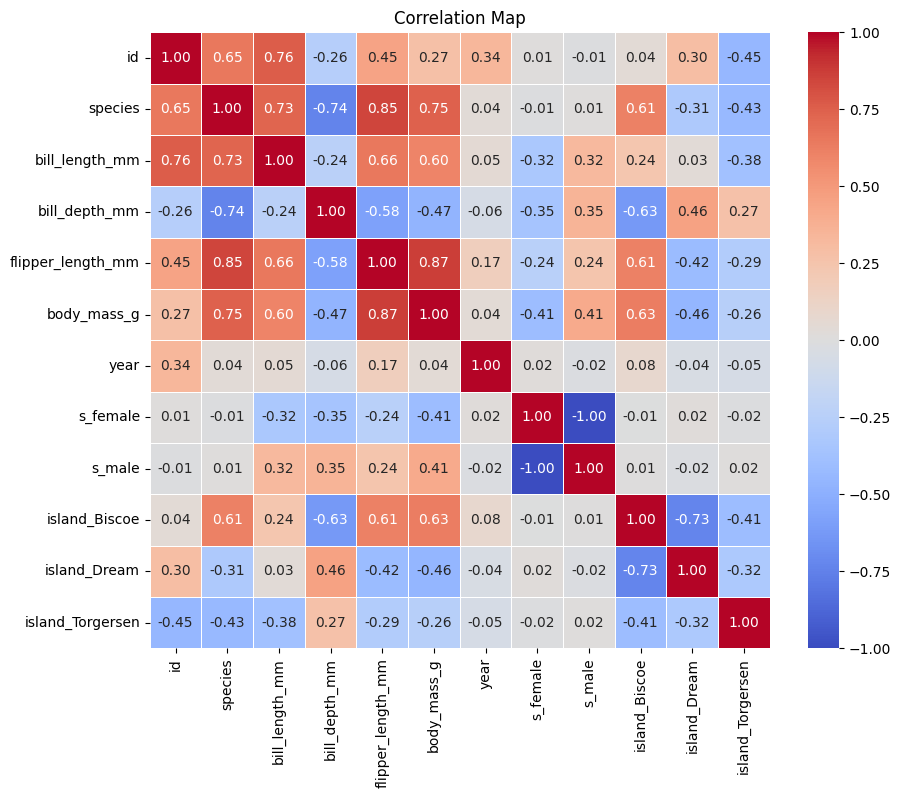

In [44]:
import seaborn as sns

# Creating a heatmap to show the correlations.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Map")
plt.show()